Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
! pip install tensorflow

/Users/sasinandan/.zshenv:2: permission denied: /Users/sasinandan/Developer/PlaydateSDK


In [3]:
## If you are using the data by mounting the google drive, use the following :
#from google.colab import drive
#drive.mount('/content/gdrive')

## Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [4]:
# Defining the path for train and test images
## Paths of train and test dataset on Google drive

data_dir_train = pathlib.Path("/Melanoma/Skin cancer/Train")
data_dir_test = pathlib.Path("/Melanoma/Skin cancer/Test")

## Paths of train and test dataset on local machine
# data_dir_train = pathlib.Path("Skin cancer ISIC The International Skin Imaging Collaboration/Train")
# data_dir_test = pathlib.Path("Skin cancer ISIC The International Skin Imaging Collaboration/Test")

In [5]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [6]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [7]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split = 0.2,
    subset='training',
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [8]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split = 0.2,
    subset='validation',
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [9]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.

class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Create a code to visualize one instance of all the nine classes present in the dataset

2025-01-15 06:03:46.615069: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


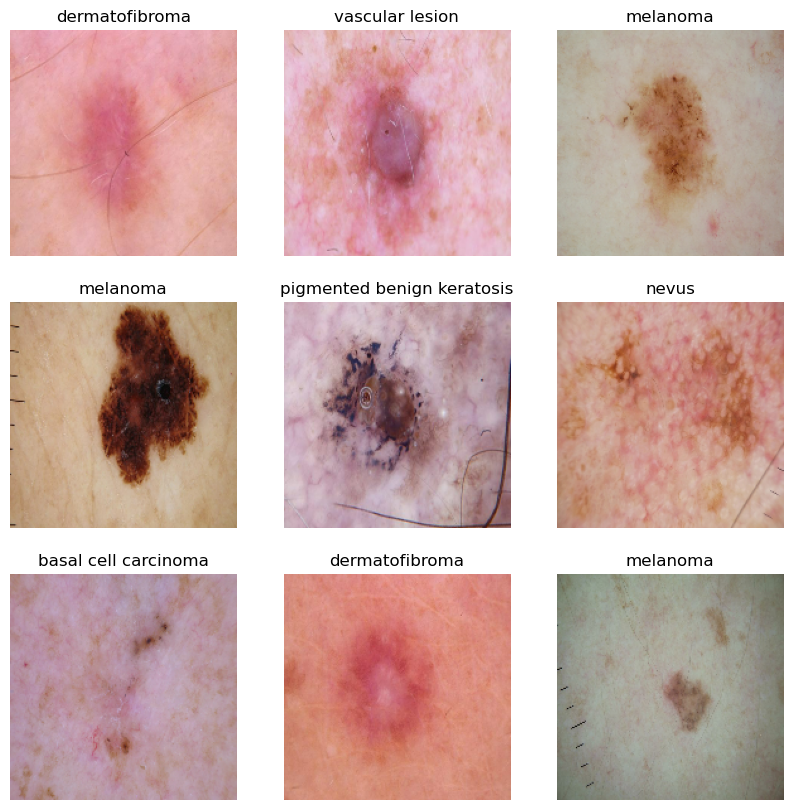

In [10]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [11]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [12]:
### Your code goes here

# Number of target labels are 9
target_labels = 9

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, (3, 3), padding='same', activation=tf.nn.relu),
  layers.MaxPooling2D(),
  layers.Conv2D(32, (3, 3), padding='same', activation=tf.nn.relu),
  layers.MaxPooling2D(),
  layers.Conv2D(64, (3, 3), padding='same', activation=tf.nn.relu),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation=tf.nn.relu),
  layers.Dense(target_labels)
])

/Users/sasinandan/anaconda3/lib/python3.11/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Compile the model
Choose an appropirate optimiser and loss function for model training

In [13]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [14]:
# View the summary of all layers
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 180, 180, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 90, 90, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 90, 90, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 9)              │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,989,801 (15.22 MB)

 Trainable params: 3,989,801 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

### Train the model

In [15]:
%%time
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 27s 134ms/step - accuracy: 0.2120 - loss: 2.0570 - val_accuracy: 0.3756 - val_loss: 1.6235
Epoch 2/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 23s 137ms/step - accuracy: 0.4444 - loss: 1.4835 - val_accuracy: 0.4388 - val_loss: 1.4352
Epoch 3/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 22s 130ms/step - accuracy: 0.5299 - loss: 1.2625 - val_accuracy: 0.5679 - val_loss: 1.2304
Epoch 4/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 22s 128ms/step - accuracy: 0.6079 - loss: 1.0766 - val_accuracy: 0.6244 - val_loss: 1.0725
Epoch 5/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 22s 129ms/step - accuracy: 0.6733 - loss: 0.9046 - val_accuracy: 0.6511 - val_loss: 0.9846
Epoch 6/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 22s 127ms/step - accuracy: 0.7358 - loss: 0.7437 - val_accuracy: 0.7164 - val_loss: 0.8563
Epoch 7/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 22s 127ms/step - accuracy: 0.7897 - loss: 0.6201 - val_accuracy: 0.7060 - val_loss: 0.8777
Epoch 8/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 22s 128ms/step - accuracy: 0.8123 - loss: 0

### Visualizing training results

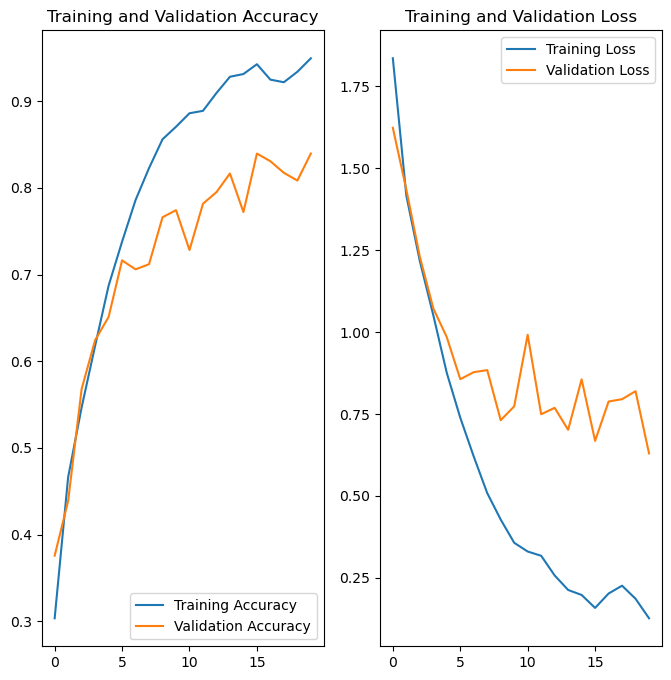

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

***Observations:***

1. The model's training accuracy shows a steady increase of upto 90%, while validation accuracy remains consistently around 55%.

2. A high training accuracy suggests the model has effectively captured the noise within the data. However, its poor performance on validation data indicates a lack of generalizability.

3. These observations confirm the presence of overfitting. To address this issue, augmentation techniques will be employed. Given the limited training data available, new samples will be generated by making slight modifications to existing data (such as horizontal/vertical image flipping, minor image rotations, etc.), which will then be used for training the model.

In [17]:
# After you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy.
# Your code goes here

augmentation_data = keras.Sequential([
                                      layers.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
                                      layers.RandomRotation(0.1),
                                      layers.RandomZoom(0.1),
])

2025-01-15 06:11:15.456959: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


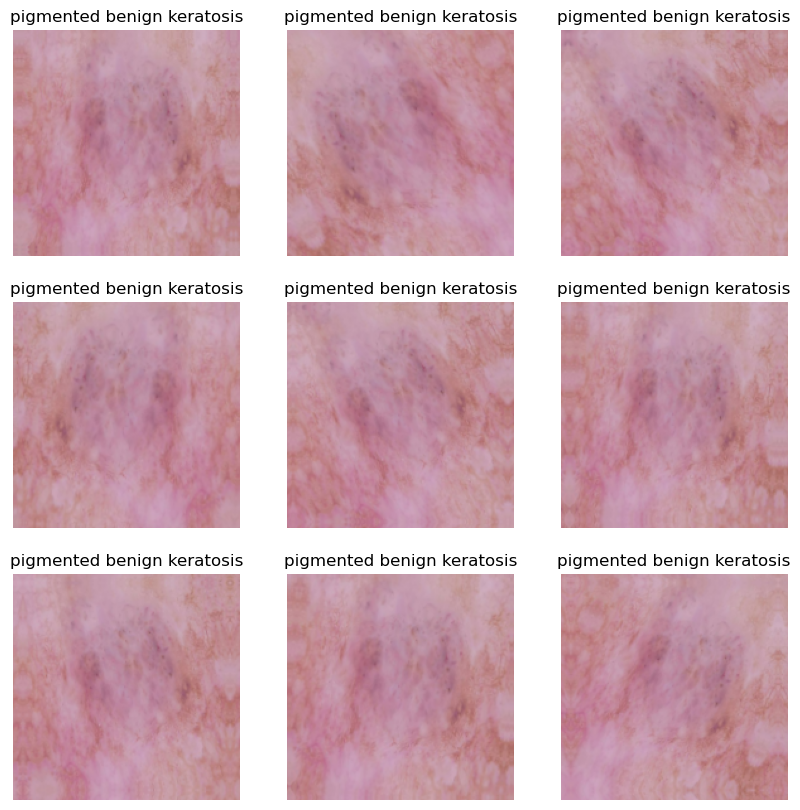

In [18]:
# Visualize how your augmentation strategy works for one instance of training image.
# Your code goes here

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        augmented_images = augmentation_data(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.title(class_names[labels[0]])
        plt.axis("off")

### Create the model, compile and train the model


In [19]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here

model = Sequential([
  augmentation_data,
  layers.Rescaling(1./255),
  layers.Conv2D(16, (3, 3), padding='same', activation=tf.nn.relu),
  layers.MaxPooling2D(),
  layers.Conv2D(32, (3, 3), padding='same', activation=tf.nn.relu),
  layers.MaxPooling2D(),
  layers.Conv2D(64, (3, 3), padding='same', activation=tf.nn.relu),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation=tf.nn.relu),
  layers.Dense(target_labels)
])

### Compiling the model

In [20]:
## Your code goes here

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [21]:
%%time
## Your code goes here, note: train your model for 20 epochs
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 25s 146ms/step - accuracy: 0.1773 - loss: 2.1644 - val_accuracy: 0.3400 - val_loss: 1.7238
Epoch 2/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 24s 143ms/step - accuracy: 0.3376 - loss: 1.6987 - val_accuracy: 0.4016 - val_loss: 1.5138
Epoch 3/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 24s 141ms/step - accuracy: 0.4349 - loss: 1.4487 - val_accuracy: 0.4826 - val_loss: 1.3931
Epoch 4/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 24s 142ms/step - accuracy: 0.4866 - loss: 1.3634 - val_accuracy: 0.4350 - val_loss: 1.4768
Epoch 5/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 24s 144ms/step - accuracy: 0.4981 - loss: 1.3315 - val_accuracy: 0.5152 - val_loss: 1.3268
Epoch 6/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 26s 155ms/step - accuracy: 0.5327 - loss: 1.2630 - val_accuracy: 0.4996 - val_loss: 1.3186
Epoch 7/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 25s 148ms/step - accuracy: 0.5256 - loss: 1.2522 - val_accuracy: 0.5360 - val_loss: 1.2238
Epoch 8/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 25s 146ms/step - accuracy: 0.5706 - loss: 1

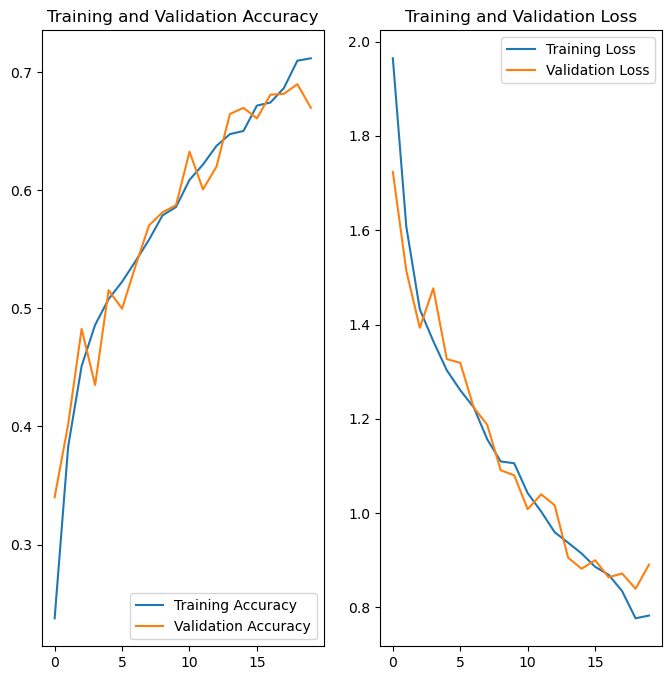

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

***Observations:***

1. By leveraging augmented data, overfitting has been effectively addressed.

2. The training and validation accuracy of the aforementioned model fall within a similar range.

3. Both the training and validation data are showing poor performance, indicating that the model is now exhibiting underfitting.

#### Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [23]:
## Your code goes here.

from glob import glob

## find the image path for all class labels (lesions)
images_path_list = [ i for i in glob(os.path.join(data_dir_train, '*', '*.jpg')) ]

## Extract the class labels (lesions)
lesions_list = [ os.path.basename(os.path.dirname(j)) for j in glob(os.path.join(data_dir_train, '*', '*.jpg')) ]
print(len(lesions_list))

2239


In [24]:
# Extract image path and class label in a dictionary
image_dict = dict(zip(images_path_list, lesions_list))
print(list(image_dict.items())[:5])

[('/Users/sasinandan/Desktop/Melanoma/Skin cancer/Train/melanoma/ISIC_0010550.jpg', 'melanoma'), ('/Users/sasinandan/Desktop/Melanoma/Skin cancer/Train/melanoma/ISIC_0011128.jpg', 'melanoma'), ('/Users/sasinandan/Desktop/Melanoma/Skin cancer/Train/melanoma/ISIC_0010587.jpg', 'melanoma'), ('/Users/sasinandan/Desktop/Melanoma/Skin cancer/Train/melanoma/ISIC_0010034.jpg', 'melanoma'), ('/Users/sasinandan/Desktop/Melanoma/Skin cancer/Train/melanoma/ISIC_0000555.jpg', 'melanoma')]


In [25]:
# View the image path and class label in a df
lesions_df = pd.DataFrame(list(image_dict.items()), columns=['Image Path', 'Label'])
lesions_df.head()

,Image Path,Label
0,/Users/sasinandan/Desktop/Melanoma/Skin cancer...,melanoma
1,/Users/sasinandan/Desktop/Melanoma/Skin cancer...,melanoma
2,/Users/sasinandan/Desktop/Melanoma/Skin cancer...,melanoma
3,/Users/sasinandan/Desktop/Melanoma/Skin cancer...,melanoma
4,/Users/sasinandan/Desktop/Melanoma/Skin cancer...,melanoma


In [26]:
## Inspecting the distribution of classes in the data
lesions_df[['Label']].value_counts()

Label                     
pigmented benign keratosis    462
melanoma                      438
basal cell carcinoma          376
nevus                         357
squamous cell carcinoma       181
vascular lesion               139
actinic keratosis             114
dermatofibroma                 95
seborrheic keratosis           77
Name: count, dtype: int64

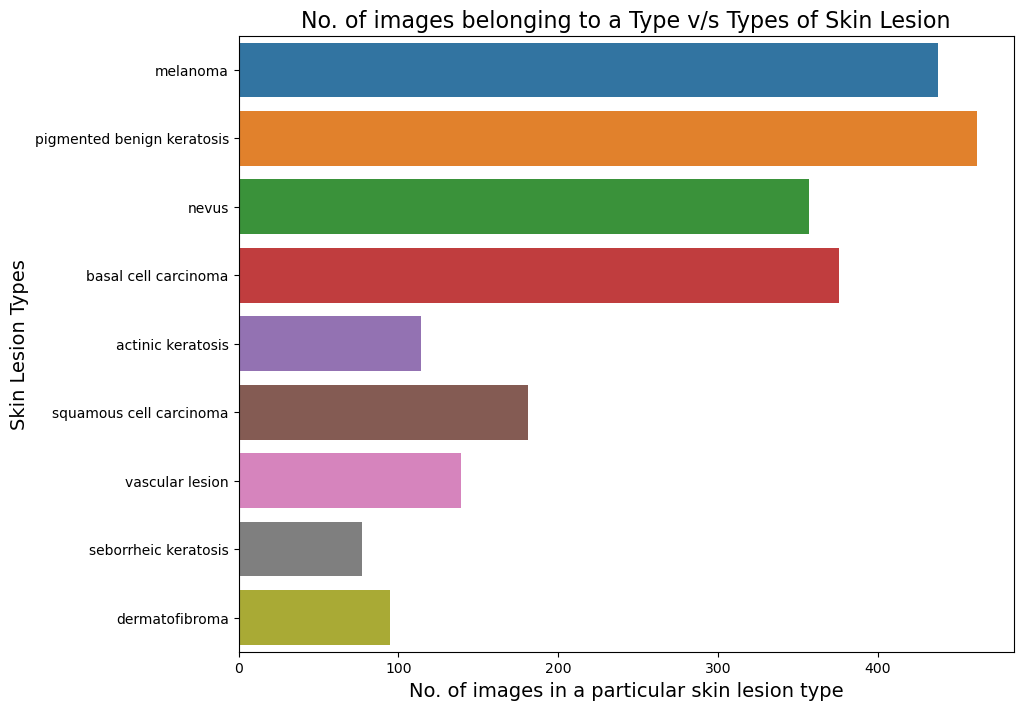

In [27]:
# Visualize the distribution of classes using a countplot

import seaborn as sns

plt.figure(figsize=(10, 8))
sns.countplot(y="Label", data=lesions_df)
plt.title('No. of images belonging to a Type v/s Types of Skin Lesion', fontsize=16)
plt.xlabel('No. of images in a particular skin lesion type', fontsize=14)
plt.ylabel('Skin Lesion Types', fontsize=14)
plt.show()

In [28]:
round(lesions_df[['Label']].value_counts(normalize=True)*100, 2)

Label                     
pigmented benign keratosis    20.63
melanoma                      19.56
basal cell carcinoma          16.79
nevus                         15.94
squamous cell carcinoma        8.08
vascular lesion                6.21
actinic keratosis              5.09
dermatofibroma                 4.24
seborrheic keratosis           3.44
Name: proportion, dtype: float64

#### Write your findings here:
#### - Which class has the least number of samples?
#### - Which classes dominate the data in terms proportionate number of samples?


***Observations:***

1. A clear class imbalance is evident within the training data.

2. The class **"seborrheic keratosis"** comprises the smallest proportion of samples, accounting for approximately **3.44%**.

3. **"Pigmented benign keratosis"** and **"melanoma"** significantly outweigh other classes, representing approximately **20.63%** and **19.56%** of the data, respectively.

#### Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [29]:
!pip install Augmentor

/Users/sasinandan/.zshenv:2: permission denied: /Users/sasinandan/Developer/PlaydateSDK


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [30]:
path_to_training_dataset = str(data_dir_train) + '/'

import Augmentor

for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /Users/sasinandan/Desktop/Melanoma/Skin cancer/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x34F3B9CD0>: 100%|█|


Initialised with 376 image(s) found.
Output directory set to /Users/sasinandan/Desktop/Melanoma/Skin cancer/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x30B3677D0>: 100%|█|


Initialised with 95 image(s) found.
Output directory set to /Users/sasinandan/Desktop/Melanoma/Skin cancer/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x30B3A1890>: 100%|█|


Initialised with 438 image(s) found.
Output directory set to /Users/sasinandan/Desktop/Melanoma/Skin cancer/Train/melanoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x


Initialised with 357 image(s) found.
Output directory set to /Users/sasinandan/Desktop/Melanoma/Skin cancer/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x3A2D60410>: 100%|█|


Initialised with 462 image(s) found.
Output directory set to /Users/sasinandan/Desktop/Melanoma/Skin cancer/Train/pigmented benign keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x3


Initialised with 77 image(s) found.
Output directory set to /Users/sasinandan/Desktop/Melanoma/Skin cancer/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x34F3ADD90>: 100%|█


Initialised with 181 image(s) found.
Output directory set to /Users/sasinandan/Desktop/Melanoma/Skin cancer/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x324A18110>: 100%|█|


Initialised with 139 image(s) found.
Output directory set to /Users/sasinandan/Desktop/Melanoma/Skin cancer/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x34F316950>: 100%|█|


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [31]:
# Verifying the total count of images after the augmentation
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

9000


### Lets see the distribution of augmented data after adding new images to the original training data.

In [32]:
# extracting the augmented image paths in a list
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_new[:5]

['/Users/sasinandan/Desktop/Melanoma/Skin cancer/Train/melanoma/output/melanoma_original_ISIC_0000159.jpg_3797644d-61a7-4982-9dce-05a22654d860.jpg',
 '/Users/sasinandan/Desktop/Melanoma/Skin cancer/Train/melanoma/output/melanoma_original_ISIC_0011112.jpg_34c08f57-792f-4343-89d8-ef93de3a9efe.jpg',
 '/Users/sasinandan/Desktop/Melanoma/Skin cancer/Train/melanoma/output/melanoma_original_ISIC_0011031.jpg_f7064d89-292d-4709-91fa-2d049afc8024.jpg',
 '/Users/sasinandan/Desktop/Melanoma/Skin cancer/Train/melanoma/output/melanoma_original_ISIC_0009913.jpg_e8643b03-385d-4c63-a06b-918460c17858.jpg',
 '/Users/sasinandan/Desktop/Melanoma/Skin cancer/Train/melanoma/output/melanoma_original_ISIC_0010741.jpg_0868dc84-3c9d-4845-b438-b8d6ea0d0707.jpg']

In [33]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new[:5]

['melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma']

In [34]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [35]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Image Path','Label'])
new_df = lesions_df.merge(df2)
new_df.shape

(0, 2)

In [36]:
# View the augmented image paths and labels in a new df
new_df.head()

,Image Path,Label


In [37]:
# Inspecting the classes after adding 500 samples per label
new_df['Label'].value_counts()

Series([], Name: count, dtype: int64)

In [38]:
# Inspecting the classes (% age wise) after adding 500 samples per label
round(new_df['Label'].value_counts(normalize=True)*100, 2)

Series([], Name: proportion, dtype: float64)

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### Train the model on the data created using Augmentor

In [39]:
batch_size = 32
img_height = 180
img_width = 180

#### Create a training dataset

In [40]:
# data_dir_train="path to directory with training data + data created using augmentor"

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 11239 files belonging to 9 classes.
Using 8992 files for training.


#### Create a validation dataset

In [41]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 11239 files belonging to 9 classes.
Using 2247 files for validation.


#### Create your model (make sure to include normalization)

In [42]:
## your code goes here

model = Sequential([
  augmentation_data,
  layers.Rescaling(1./255),
  layers.Conv2D(16, (3, 3), padding='same', activation=tf.nn.relu),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Conv2D(32, (3, 3), padding='same', activation=tf.nn.relu),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Conv2D(64, (3, 3), padding='same', activation=tf.nn.relu),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation=tf.nn.relu),
  layers.Dense(target_labels)
])

#### Compile your model (Choose optimizer and loss function appropriately)

In [43]:
## your code goes here

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### Train your model

In [44]:
%%time
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 71s 250ms/step - accuracy: 0.2399 - loss: 3.3841 - val_accuracy: 0.1273 - val_loss: 7.8930
Epoch 2/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 66s 235ms/step - accuracy: 0.4417 - loss: 1.4805 - val_accuracy: 0.4499 - val_loss: 1.5422
Epoch 3/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 65s 230ms/step - accuracy: 0.4965 - loss: 1.2881 - val_accuracy: 0.3351 - val_loss: 2.6675
Epoch 4/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 65s 232ms/step - accuracy: 0.5253 - loss: 1.2014 - val_accuracy: 0.4304 - val_loss: 1.4762
Epoch 5/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 65s 232ms/step - accuracy: 0.5600 - loss: 1.1168 - val_accuracy: 0.4384 - val_loss: 1.7703
Epoch 6/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 70s 249ms/step - accuracy: 0.5719 - loss: 1.0943 - val_accuracy: 0.5185 - val_loss: 1.2949
Epoch 7/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 64s 226ms/step - accuracy: 0.5886 - loss: 1.0521 - val_accuracy: 0.4428 - val_loss: 1.7290
Epoch 8/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 64s 228ms/step - accuracy: 0.6027 - loss: 1

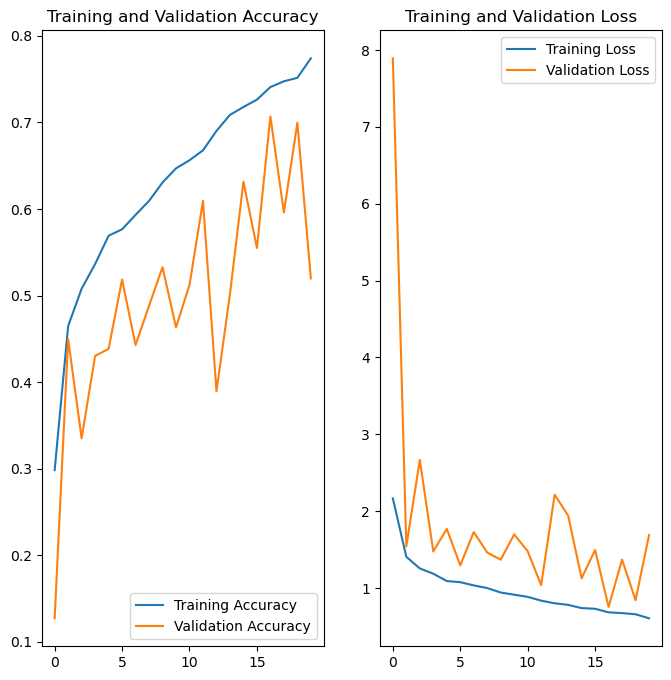

In [45]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

***Observations:***

1. Implementing batch normalization in the model yielded a slight uptick in both training and validation accuracy.
2. Formulating an alternative model without batch normalization aims to investigate prospective improvements in accuracy.

#### Creating another model (without batch normalization)

In [46]:
# create the model
model = Sequential([
  augmentation_data,
  layers.Rescaling(1./255),
  layers.Conv2D(16, (3, 3), padding='same', activation=tf.nn.relu),
  layers.MaxPooling2D(),
  layers.Conv2D(32, (3, 3), padding='same', activation=tf.nn.relu),
  layers.MaxPooling2D(),
  layers.Conv2D(64, (3, 3), padding='same', activation=tf.nn.relu),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation=tf.nn.relu),
  layers.Dense(target_labels)
])

#### Compiling the model

In [47]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# ModelCheckpoint callback is employed alongside the model.fit() training process to periodically save the model
# or its weights (in a checkpoint file)
checkpoint = ModelCheckpoint("model.keras", monitor="val_accuracy", save_best_only=True, mode="auto", verbose=1)

# Early stop the training when a monitored metric ceases to show improvement
earlystop = EarlyStopping(monitor="val_accuracy", patience=5, mode="auto", verbose=1)

#### Training the model

In [48]:
%%time
# train the model
epochs = 50
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[checkpoint, earlystop]
)

Epoch 1/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step - accuracy: 0.2297 - loss: 1.9954
Epoch 1: val_accuracy improved from -inf to 0.42190, saving model to model.keras
281/281 ━━━━━━━━━━━━━━━━━━━━ 48s 170ms/step - accuracy: 0.2300 - loss: 1.9947 - val_accuracy: 0.4219 - val_loss: 1.4846
Epoch 2/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step - accuracy: 0.4356 - loss: 1.4723
Epoch 2: val_accuracy improved from 0.42190 to 0.47040, saving model to model.keras
281/281 ━━━━━━━━━━━━━━━━━━━━ 48s 169ms/step - accuracy: 0.4357 - loss: 1.4721 - val_accuracy: 0.4704 - val_loss: 1.4070
Epoch 3/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step - accuracy: 0.4877 - loss: 1.3338
Epoch 3: val_accuracy improved from 0.47040 to 0.51402, saving model to model.keras
281/281 ━━━━━━━━━━━━━━━━━━━━ 47s 168ms/step - accuracy: 0.4877 - loss: 1.3337 - val_accuracy: 0.5140 - val_loss: 1.3374
Epoch 4/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step - accuracy: 0.5227 - loss: 1.2563
Epoch 4: val_accuracy improved from 0.5

281/281 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step - accuracy: 0.8247 - loss: 0.4542
Epoch 24: val_accuracy improved from 0.83667 to 0.85581, saving model to model.keras
281/281 ━━━━━━━━━━━━━━━━━━━━ 48s 169ms/step - accuracy: 0.8247 - loss: 0.4541 - val_accuracy: 0.8558 - val_loss: 0.4465
Epoch 25/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - accuracy: 0.8505 - loss: 0.3956
Epoch 25: val_accuracy did not improve from 0.85581
281/281 ━━━━━━━━━━━━━━━━━━━━ 48s 169ms/step - accuracy: 0.8505 - loss: 0.3956 - val_accuracy: 0.8509 - val_loss: 0.4585
Epoch 26/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - accuracy: 0.8520 - loss: 0.4032
Epoch 26: val_accuracy did not improve from 0.85581
281/281 ━━━━━━━━━━━━━━━━━━━━ 48s 169ms/step - accuracy: 0.8520 - loss: 0.4032 - val_accuracy: 0.8487 - val_loss: 0.4708
Epoch 27/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - accuracy: 0.8438 - loss: 0.4146
Epoch 27: val_accuracy improved from 0.85581 to 0.85803, saving model to model.keras
281/281 ━━━━━━━━━━━━━━

281/281 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step - accuracy: 0.8993 - loss: 0.2766
Epoch 48: val_accuracy did not improve from 0.90031
281/281 ━━━━━━━━━━━━━━━━━━━━ 49s 173ms/step - accuracy: 0.8993 - loss: 0.2766 - val_accuracy: 0.8981 - val_loss: 0.3385
Epoch 49/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step - accuracy: 0.9075 - loss: 0.2508
Epoch 49: val_accuracy did not improve from 0.90031
281/281 ━━━━━━━━━━━━━━━━━━━━ 47s 168ms/step - accuracy: 0.9075 - loss: 0.2508 - val_accuracy: 0.8723 - val_loss: 0.4664
Epoch 50/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step - accuracy: 0.9066 - loss: 0.2479
Epoch 50: val_accuracy did not improve from 0.90031
281/281 ━━━━━━━━━━━━━━━━━━━━ 47s 169ms/step - accuracy: 0.9066 - loss: 0.2480 - val_accuracy: 0.8861 - val_loss: 0.3899
Epoch 50: early stopping
CPU times: user 3h 35min 28s, sys: 26min 5s, total: 4h 1min 34s
Wall time: 39min 38s


#### Visualize the model results

In [49]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)       │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_3 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 180, 180, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 90, 90, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 90, 90, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │     3,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 9)              │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,969,405 (45.66 MB)

 Trainable params: 3,989,801 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,979,604 (30.44 MB)

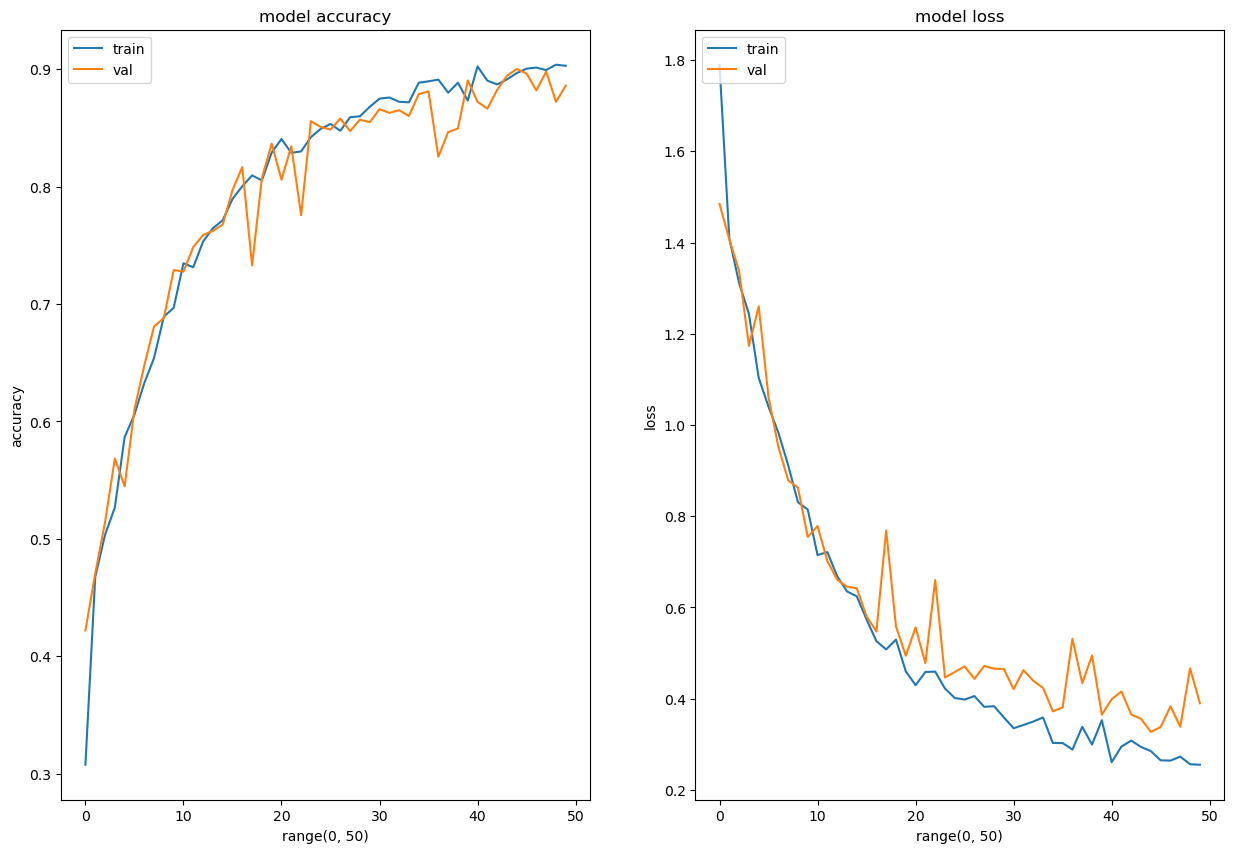

In [50]:
# Plot the training curves

epochs_range = range(earlystop.stopped_epoch+1)

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)

#Plot Model Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel(epochs_range)
plt.legend(['train', 'val'], loc='upper left')

#Plot Model Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel(epochs_range)
plt.legend(['train', 'val'], loc='upper left')
plt.show()

#### Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



***Observations:***

1. The ultimate model showcases well-balanced performance, displaying no signs of underfitting or overfitting.

2. The implementation of class rebalancing has notably enhanced the model's performance across both training and validation datasets.

3. Following 37 epochs, the final model attains an accuracy of 84% on the training set and approximately 79% on the validation set.

4. The narrow divergence between training and validation accuracies underscores the robust generalization capability of the final CNN model.

5. The addition of batch normalization failed to enhance both training and validation accuracy.

### Model Evaluation

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Actual Class: basal cell carcinoma
Predicted Class: pigmented benign keratosis


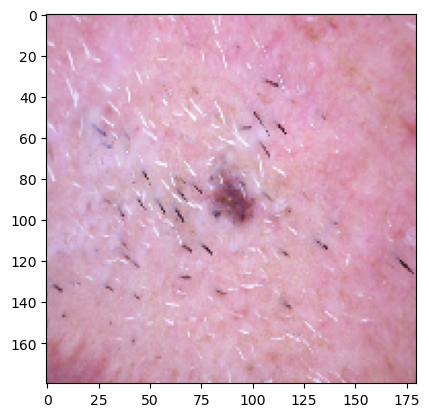

In [51]:
# Evaluating our model on one of the instances in the test set

from tensorflow.keras.preprocessing.image import load_img

image_path_test = os.path.join(data_dir_test, class_names[1], '*')
test_image = glob(image_path_test)
test_image = load_img(test_image[-1], target_size=(180, 180, 3))
plt.imshow(test_image)
plt.grid(False)

img = np.expand_dims(test_image, axis=0)
predicted = model.predict(img)
predicted = np.argmax(predicted)
predicted_class = class_names[predicted]
print("Actual Class: " + class_names[1] +'\n'+ "Predicted Class: " + predicted_class)